In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

In [7]:
car = pd.read_csv('http://bit.ly/dwp-data-car')

In [ ]:
# Define x / parameter and y / target
x = car.drop(columns=['MPG'])
y = car['MPG']


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


# Initiate the model (neural network)

## Neural Network in Tensorflow
model = Sequential()

## Add Hidden Layer
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))

## Add Output Layer
model.add(Dense(1, activation='relu'))

## Compile Model
model.compile(loss='mae', optimizer=Adam(lr=0.001))


# Training Process - Testing Process - Evaluation

history = model.fit(x_train, 
                    y_train, 
                    batch_size=64,
                    epochs=100,
                    validation_data=(x_test, y_test))

## Neural Network for Classification

In [10]:
df_car = car

In [18]:
car_processed = pd.get_dummies(df_car, columns= ['Origin'])

In [20]:
car_processed.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,MPG,Origin_1,Origin_2,Origin_3
0,8,307,130,3504,12,70,18,1,0,0
1,8,350,165,3693,11,70,15,1,0,0
2,8,318,150,3436,11,70,18,1,0,0
3,8,304,150,3433,12,70,16,1,0,0
4,8,302,140,3449,10,70,17,1,0,0


In [28]:
# Define x / parameter and y / target
x = car_processed.drop(columns=['Origin_1',
                                'Origin_2','Origin_3'])
y = car_processed[['Origin_1','Origin_2','Origin_3']]


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


# Initiate the model (neural network)

## Neural Network in Tensorflow
model = Sequential()

## Add Hidden Layer
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))

## Add Output Layer
model.add(Dense(3, activation='softmax')) #samain dengan jumlah output

## Compile Model
model.compile(loss='categorical_crossentropy'
              ,optimizer=Adam(lr=0.001) #learning rate
              ,metrics=('accuracy'))


# Training Process - Testing Process - Evaluation

history = model.fit(x_train, 
                    y_train, 
                    batch_size=64,
                    epochs=100,
                    validation_data=(x_test, y_test))

Epoch 1/100
5/5 [==============================] - 0s 56ms/step - loss: 1.0464 - accuracy: 0.3642 - val_loss: 1.0161 - val_accuracy: 0.3671
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 1.0276 - accuracy: 0.4058 - val_loss: 0.9935 - val_accuracy: 0.4810
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0073 - accuracy: 0.4696 - val_loss: 0.9715 - val_accuracy: 0.5443
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.9877 - accuracy: 0.5240 - val_loss: 0.9502 - val_accuracy: 0.5949
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.9683 - accuracy: 0.5591 - val_loss: 0.9294 - val_accuracy: 0.6582
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.9498 - accuracy: 0.6006 - val_loss: 0.9095 - val_accuracy: 0.6962
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.9321 - accuracy: 0.6198 - val_loss: 0.8910 - val_accuracy: 0.7089
Epoch 8/100
5/5 [=========

Epoch 58/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6623 - accuracy: 0.6645 - val_loss: 0.5677 - val_accuracy: 0.7468
Epoch 59/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6608 - accuracy: 0.6645 - val_loss: 0.5662 - val_accuracy: 0.7468
Epoch 60/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6594 - accuracy: 0.6645 - val_loss: 0.5645 - val_accuracy: 0.7468
Epoch 61/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6579 - accuracy: 0.6645 - val_loss: 0.5631 - val_accuracy: 0.7468
Epoch 62/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6564 - accuracy: 0.6645 - val_loss: 0.5615 - val_accuracy: 0.7468
Epoch 63/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6550 - accuracy: 0.6645 - val_loss: 0.5602 - val_accuracy: 0.7468
Epoch 64/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6535 - accuracy: 0.6677 - val_loss: 0.5587 - val_accuracy: 0.7468
Epoch 65/100
5/5 [==

kalo one hot encoding
- activation outputnya = softmax
- loss nya categorical_crossentropy

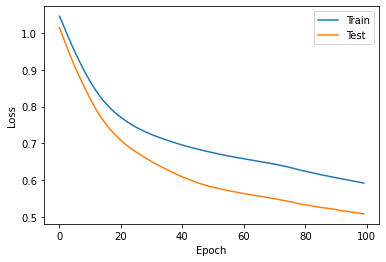

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

## Underfitting & Overfitting

**Underfitting**<br>
model tidak dapat 'belajar' dari data yang diberikan
*Penyebab -> data yang kurang banyak*

**Overfitting**<br>
model terlalu belajar dari data training, sehingga tidak bisa memprediksi dengan baik pada data testing<br>
*Penyebab -> data di data training terlalu*


### Tensorflow for Classifying Images

In [53]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [39]:
x_train.shape

(60000, 28, 28)

In [40]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

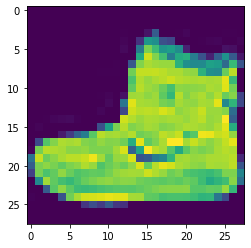

In [41]:
plt.imshow(x_train[0])

In [45]:
x_train.shape

(60000, 28, 28)

In [54]:
x_train = x_train.reshape(60000,784)

In [49]:
x_train.shape[1]

784

In [51]:
x_test.shape

(10000, 28, 28)

In [55]:
x_test = x_test.reshape(10000,784)

In [81]:
#import the data
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Initiate the model (neural network)

## Neural Network in Tensorflow
model = Sequential()

## Add Hidden Layer
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu')) 
model.add(Dense(32, activation='relu'))

## Add Output Layer
model.add(Dense(10, activation='softmax')) #samain dengan jumlah output

## Compile Model
model.compile(loss='sparse_categorical_crossentropy'
              ,optimizer=Adam(lr=0.005) #learning rate
              ,metrics=('accuracy'))


# Training Process - Testing Process - Evaluation

history = model.fit(x_train, 
                    y_train, 
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 3.0843 - accuracy: 0.4179 - val_loss: 1.4337 - val_accuracy: 0.4508
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 1.0448 - accuracy: 0.6025 - val_loss: 0.8935 - val_accuracy: 0.6966
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8013 - accuracy: 0.6964 - val_loss: 0.7705 - val_accuracy: 0.7048
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6521 - accuracy: 0.7457 - val_loss: 0.6337 - val_accuracy: 0.7551
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6533 - accuracy: 0.7499 - val_loss: 0.6769 - val_accuracy: 0.7430
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6233 - accuracy: 0.7553 - val_loss: 0.6137 - val_accuracy: 0.7629
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6213 - accuracy: 0.7579 - val_loss: 0.6713 - val_accuracy: 0.7282
Epoch 

In [63]:
x_test[0].reshape(1,-1).shape

(1, 784)

In [69]:
model.predict(x_test[0].reshape(1,-1))

array([[2.1479047e-18, 1.1942793e-21, 4.1703159e-31, 2.7106346e-16,
        3.1248499e-25, 8.3385475e-02, 6.3859533e-24, 4.6948589e-02,
        3.6327484e-12, 8.6966592e-01]], dtype=float32)

In [ ]:
result = list(model.predict(x_test[0].reshape(1,-1))[0])

<AxesSubplot:>

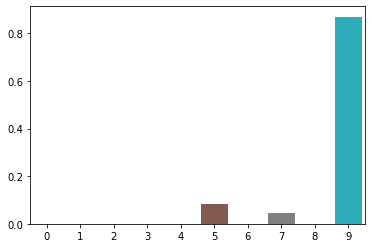

In [68]:
sns.barplot(x=[0,1,2,3,4,5,6,7,8,9], y = result)

### Pickle<br>
cara transfer model

In [71]:
!pip install joblib

You should consider upgrading via the 'c:\users\ifans\miniconda3\python.exe -m pip install --upgrade pip' command.


In [73]:
# from sklearn.externals import joblib
import pickle
import joblib

In [77]:
model = LinearRegression()

#### Export model

In [78]:
joblib.dump(model, 'linear_regression.pkl')

['linear_regression.pkl']

In [82]:
#kalo tensorflow
model.save('neural_network.pkl')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: neural_network.pkl\assets


#### Import Model

In [79]:
new_model = joblib.load('linear_regression.pkl')

In [80]:
new_model.predict()

TypeError: predict() missing 1 required positional argument: 'X'